In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## CSV Import

In [11]:
#loading data
# path = 'https://raw.githubusercontent.com/YuvalRozner/BetterWeather/main/data/JER_data.csv'
path = 'data\JER_data.csv'
df = pd.read_csv(path)
df.head()

C:\Users\gr062\AppData\Local\Temp\ipykernel_12508\1301601356.py:4: DtypeWarning: Columns (1,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,Date Time,BP (hPa),DiffR (w/m^2),Grad (w/m^2),NIP (w/m^2),RH (%),TD (degC),TDmax (degC),TDmin (degC),WD (deg),WDmax (deg),WS (m/s),Ws1mm (m/s),Ws10mm (m/s),WSmax (m/s),STDwd (deg)
0,01/01/2000 00:00,-,NaN,NaN,NaN,-,17.3,17.4,17.3,102,97,1.6,2.4,1.7,2.8,9.8
1,01/01/2000 00:10,-,NaN,NaN,NaN,-,17.3,17.4,17.3,100,101,1.9,2.2,1.9,2.4,11.0
2,01/01/2000 00:20,-,NaN,NaN,NaN,-,17.3,17.3,17.3,89,88,1.9,2.1,2,2.4,9.9
3,01/01/2000 00:30,-,NaN,NaN,NaN,-,17.4,17.4,17.3,77,76,2.4,2.9,2.4,3.6,10.2
4,01/01/2000 00:40,-,NaN,NaN,NaN,-,17.3,17.4,17.1,73,85,2.6,2.8,2.6,3.2,8.9


## Organize the dataframe

### Delete unecessery columns

In [12]:
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[::6]
df = df.drop(columns=['NIP (w/m^2)'])
df = df.drop(columns=['DiffR (w/m^2)'])
df = df.drop(columns=['Grad (w/m^2)'])

date_time = pd.to_datetime(df.pop('Date Time'), format="%d/%m/%Y %H:%M")

df = df.apply(pd.to_numeric, errors='coerce')

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BP (hPa),160487.0,922.490836,3.683396,907.04,919.76,922.3,924.93,937.44
RH (%),160231.0,57.103195,24.117456,4.00,37.00,56.0,79.00,100.00
TD (degC),209755.0,17.955506,7.041178,-1.70,12.10,18.3,23.30,41.60
TDmax (degC),209760.0,18.084489,7.084270,-1.60,12.30,18.4,23.40,42.00
TDmin (degC),209757.0,17.829548,6.999501,-1.80,12.00,18.2,23.10,41.40
WD (deg),209910.0,236.100962,90.439883,0.00,180.00,273.0,300.00,360.00
WDmax (deg),209856.0,235.435832,92.249904,0.00,173.00,273.0,301.00,360.00
WS (m/s),209652.0,3.336034,1.635589,0.00,2.10,3.2,4.30,15.60
Ws1mm (m/s),209647.0,4.489605,2.079202,0.00,3.00,4.3,5.70,21.70
Ws10mm (m/s),209655.0,3.590693,1.685942,0.00,2.40,3.4,4.60,17.30


### Transform the wind parameters into Vectors

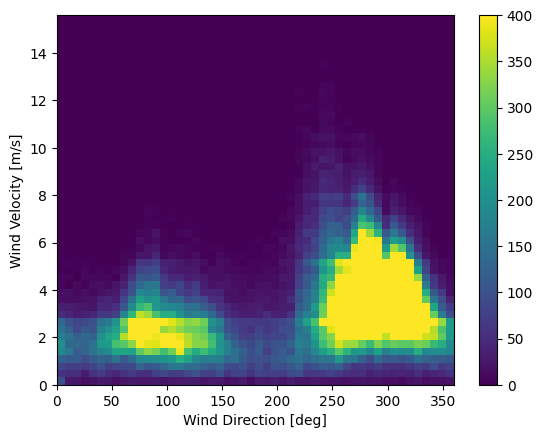

In [13]:
# Use boolean indexing to filter out NaN values for plotting
mask = ~np.isnan(df['WD (deg)']) & ~np.isnan(df['WS (m/s)'])

# Create the 2D histogram plot
plt.hist2d(df['WD (deg)'][mask], df['WS (m/s)'][mask], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')
plt.show()

In [14]:
ws = df.pop('WS (m/s)')
max_ws = df.pop('WSmax (m/s)')

# Convert to radians.
wd_rad = df.pop('WD (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = ws*np.cos(wd_rad)
df['Wy'] = ws*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_ws*np.cos(wd_rad)
df['max Wy'] = max_ws*np.sin(wd_rad)

(-10.502361084944306, 7.44781847254617, -14.464068131241882, 8.89363423045623)

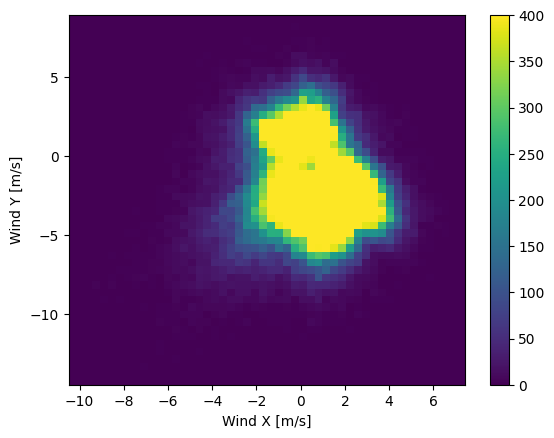

In [15]:
# Use boolean indexing to filter out NaN values for plotting
mask = ~np.isnan(df['Wx']) & ~np.isnan(df['Wy'])

plt.hist2d(df['Wx'][mask], df['Wy'][mask], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [16]:
df.head()

,BP (hPa),RH (%),TD (degC),TDmax (degC),TDmin (degC),WDmax (deg),Ws1mm (m/s),Ws10mm (m/s),STDwd (deg),Wx,Wy,max Wx,max Wy
0,NaN,NaN,17.3,17.4,17.3,97.0,2.4,1.7,9.8,-0.332659,1.565036,-0.582153,2.738813
6,NaN,NaN,17.0,17.0,16.9,58.0,2.9,2.2,14.2,0.400699,2.061417,0.686912,3.533858
12,NaN,NaN,17.3,17.3,17.2,92.0,2.1,2.1,16.2,-0.118586,1.695859,-0.167416,2.394154
18,NaN,NaN,16.7,16.8,16.7,75.0,1.8,1.9,8.6,0.234652,1.481533,0.312869,1.975377
24,NaN,NaN,16.6,16.6,16.5,84.0,2.0,1.8,9.6,-0.094205,1.797533,-0.125606,2.396711


### Time cicles (days ans years)

Text(0.5, 1.0, 'Time of 2 years signal')

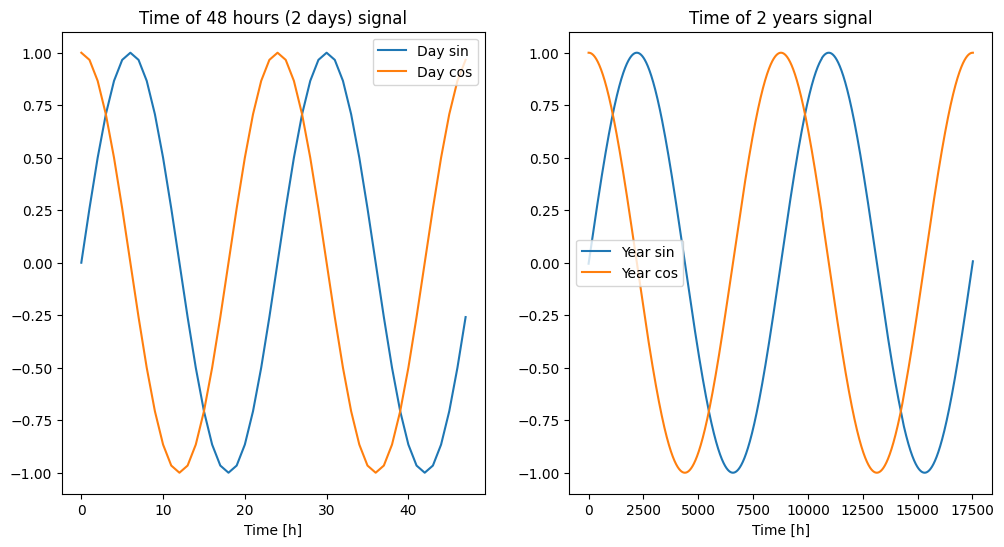

In [17]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the Day sin and cos on the first subplot
ax[0].plot(np.array(df['Day sin'])[:48])
ax[0].plot(np.array(df['Day cos'])[:48])
ax[0].legend(['Day sin', 'Day cos'])
ax[0].set_xlabel('Time [h]')
ax[0].set_title('Time of 48 hours (2 days) signal')

# Plot the Year sin and cos on the second subplot
ax[1].plot(np.array(df['Year sin'])[:365*2*24])
ax[1].plot(np.array(df['Year cos'])[:365*2*24])
ax[1].legend(['Year sin', 'Year cos'])
ax[1].set_xlabel('Time [h]')
ax[1].set_title('Time of 2 years signal')

In [18]:
df.head()

,BP (hPa),RH (%),TD (degC),TDmax (degC),TDmin (degC),WDmax (deg),Ws1mm (m/s),Ws10mm (m/s),STDwd (deg),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
0,NaN,NaN,17.3,17.4,17.3,97.0,2.4,1.7,9.8,-0.332659,1.565036,-0.582153,2.738813,-5.461913e-12,1.000000,-0.004731,0.999989
6,NaN,NaN,17.0,17.0,16.9,58.0,2.9,2.2,14.2,0.400699,2.061417,0.686912,3.533858,2.588190e-01,0.965926,-0.004014,0.999992
12,NaN,NaN,17.3,17.3,17.2,92.0,2.1,2.1,16.2,-0.118586,1.695859,-0.167416,2.394154,5.000000e-01,0.866025,-0.003297,0.999995
18,NaN,NaN,16.7,16.8,16.7,75.0,1.8,1.9,8.6,0.234652,1.481533,0.312869,1.975377,7.071068e-01,0.707107,-0.002580,0.999997
24,NaN,NaN,16.6,16.6,16.5,84.0,2.0,1.8,9.6,-0.094205,1.797533,-0.125606,2.396711,8.660254e-01,0.500000,-0.001864,0.999998


## Save new .csv dataset 

In [19]:
filename = 'JER_data_fixed'
fullPath = 'data/' + filename + '.csv'
df.to_csv(fullPath, index=False)
print(f"new csv file saved to: '{fullPath}'")

new csv file saved to: 'data/JER_data_fixed.csv'
